In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
import seaborn as sns

In [5]:
df = pd.read_csv("prepared_df.csv")

/var/folders/wk/w4dq25x94cg_26_p83q6tnlh0000gn/T/ipykernel_6046/4142858832.py:1: DtypeWarning: Columns (24,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("prepared_df.csv")


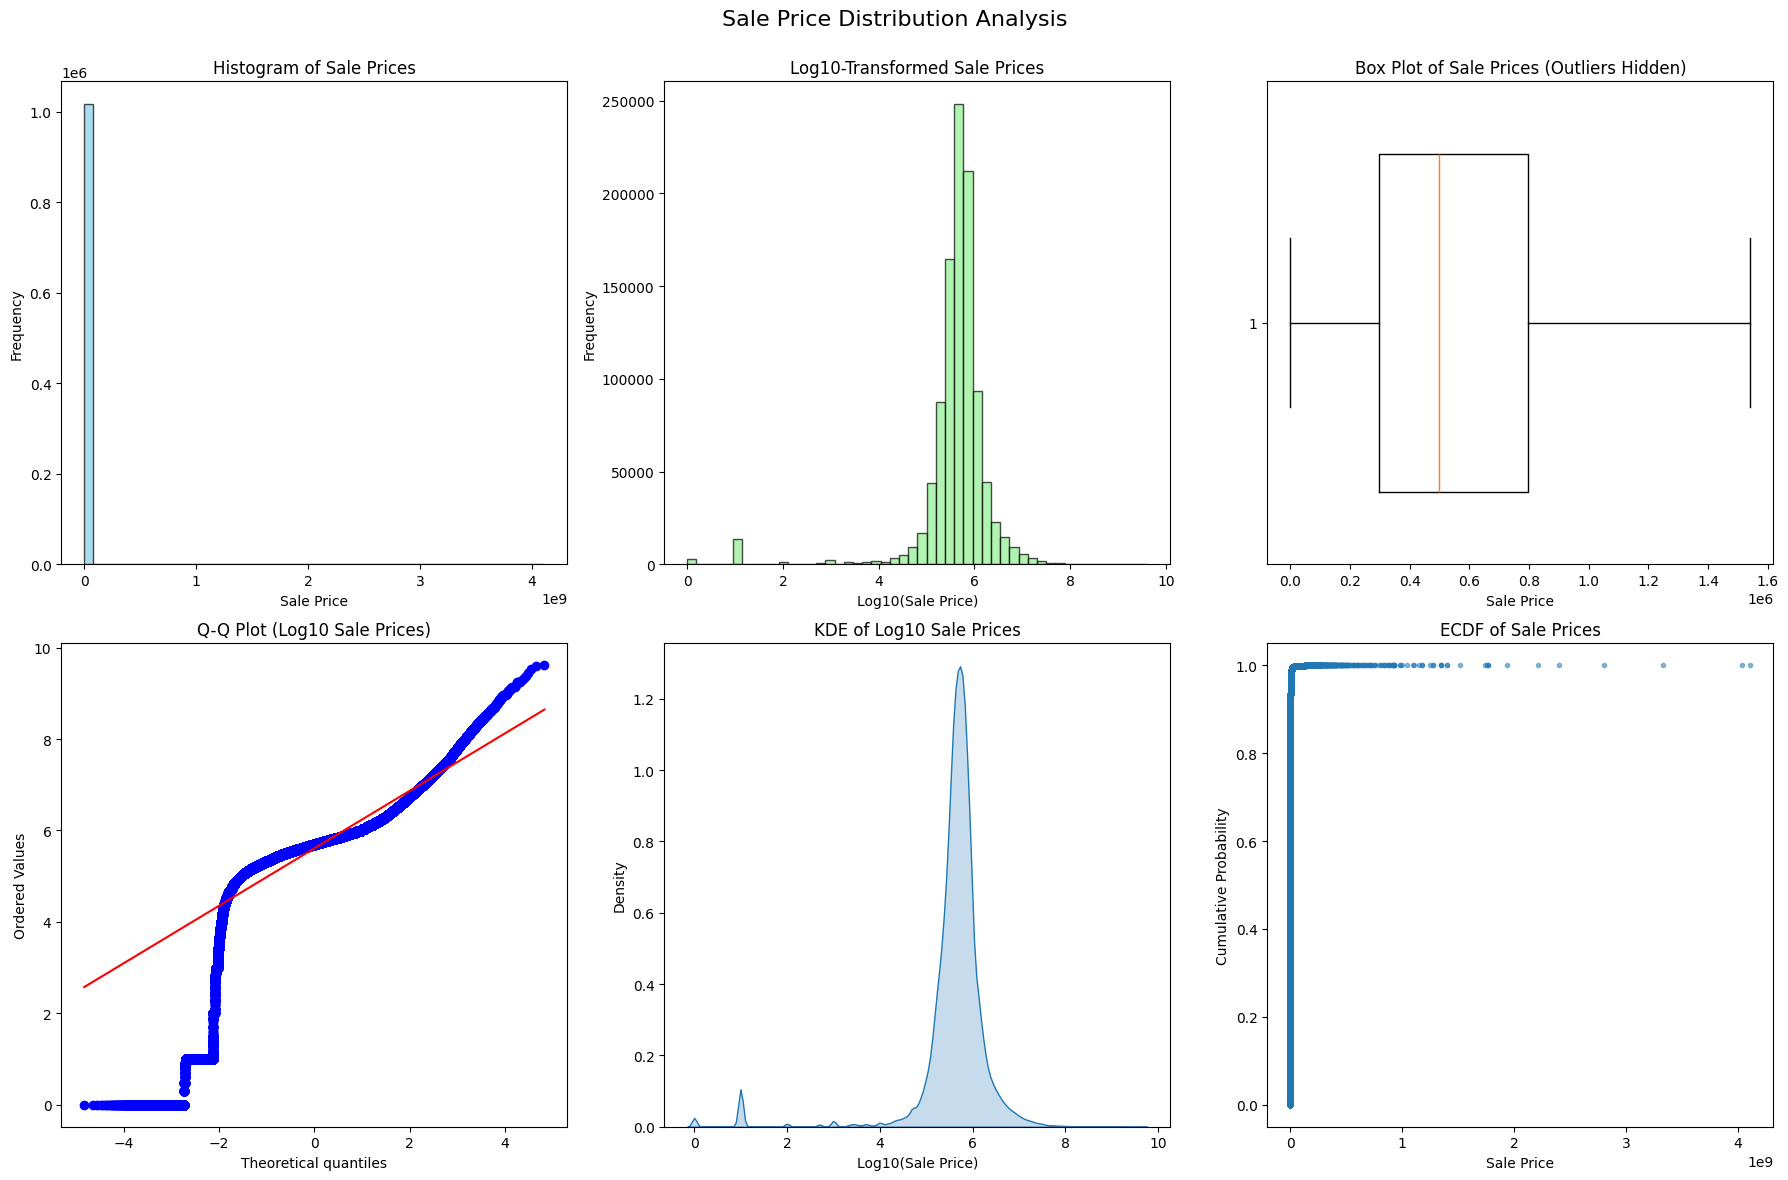

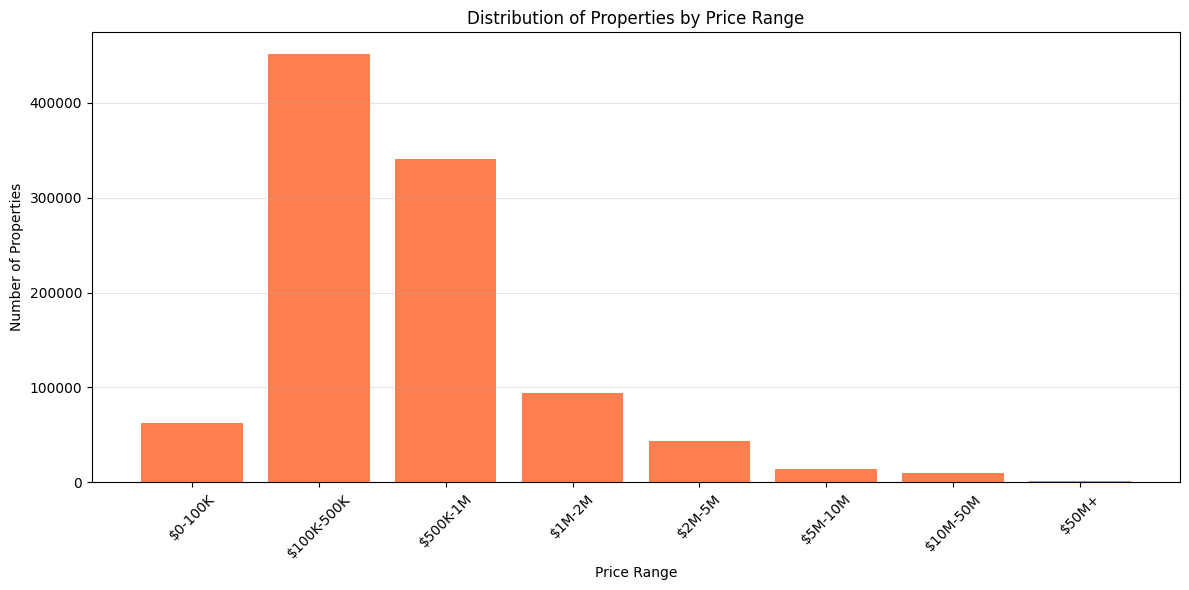

In [7]:
# Set up the figure with multiple plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Sale Price Distribution Analysis', fontsize=16)

# Filter out zero or negative values
filtered_prices = df[df["sale price"] > 0]["sale price"]

# 1. Histogram
axes[0, 0].hist(filtered_prices, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Histogram of Sale Prices')
axes[0, 0].set_xlabel('Sale Price')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# 2. Log-transformed histogram
axes[0, 1].hist(np.log10(filtered_prices), bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Log10-Transformed Sale Prices')
axes[0, 1].set_xlabel('Log10(Sale Price)')
axes[0, 1].set_ylabel('Frequency')

# 3. Box plot - hide outliers by setting showfliers=False
axes[0, 2].boxplot(filtered_prices, vert=False, widths=0.7, showfliers=False)
axes[0, 2].set_title('Box Plot of Sale Prices (Outliers Hidden)')
axes[0, 2].set_xlabel('Sale Price')
axes[0, 2].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# 4. Q-Q plot
qq = ss.probplot(np.log10(filtered_prices), plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Log10 Sale Prices)')

# 5. Kernel Density Estimation
sns.kdeplot(np.log10(filtered_prices), ax=axes[1, 1], fill=True)
axes[1, 1].set_title('KDE of Log10 Sale Prices')
axes[1, 1].set_xlabel('Log10(Sale Price)')
axes[1, 1].set_ylabel('Density')

# 6. ECDF (Empirical Cumulative Distribution Function)
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)
    return x, y

x, y = ecdf(filtered_prices)
axes[1, 2].plot(x, y, marker='.', linestyle='none', alpha=0.5)
axes[1, 2].set_title('ECDF of Sale Prices')
axes[1, 2].set_xlabel('Sale Price')
axes[1, 2].set_ylabel('Cumulative Probability')
axes[1, 2].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# Additional plot for price range distribution
plt.figure(figsize=(12, 6))

# Define price ranges
price_ranges = [
    (0, 1e5), (1e5, 5e5), (5e5, 1e6), (1e6, 2e6), 
    (2e6, 5e6), (5e6, 1e7), (1e7, 5e7), (5e7, np.inf)
]
labels = [
    '$0-100K', '$100K-500K', '$500K-1M', '$1M-2M',
    '$2M-5M', '$5M-10M', '$10M-50M', '$50M+'
]

# Count properties in each range
counts = []
for lower, upper in price_ranges:
    count = len(filtered_prices[(filtered_prices >= lower) & (filtered_prices < upper)])
    counts.append(count)

# Plot bar chart
plt.bar(labels, counts, color='coral')
plt.title('Distribution of Properties by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

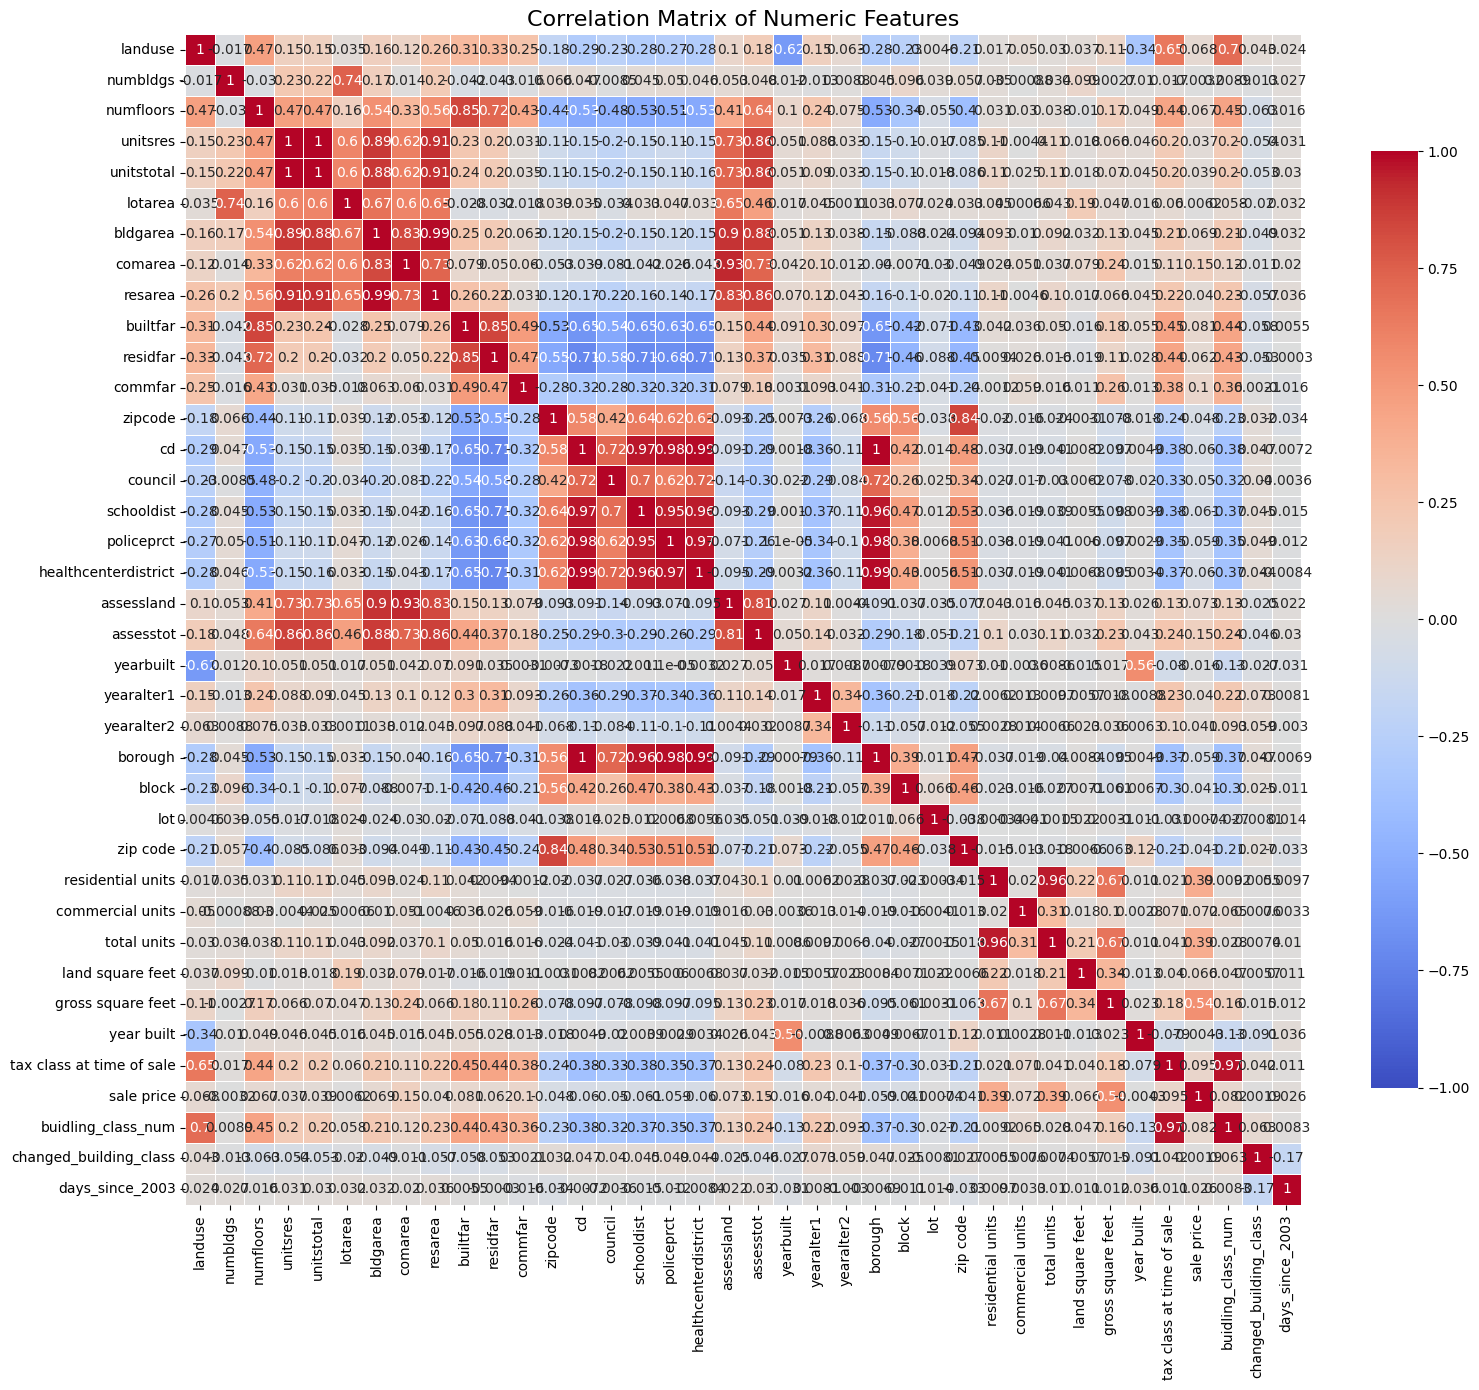

In [8]:
# Let's select only the numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_cols].corr()

# Create a heatmap with a good color scheme
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='coolwarm',        # Blue-red color scheme
            vmin=-1, vmax=1,        # Set limits for correlation
            center=0,               # Center the colormap at 0
            linewidths=.5,          # Add lines between cells
            cbar_kws={"shrink": .8})

plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()